In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
import cv2
image = cv2.imread("mountain.jpg")
image = cv2.resize(image,(400,400))
cv2.waitKey(0)

-1

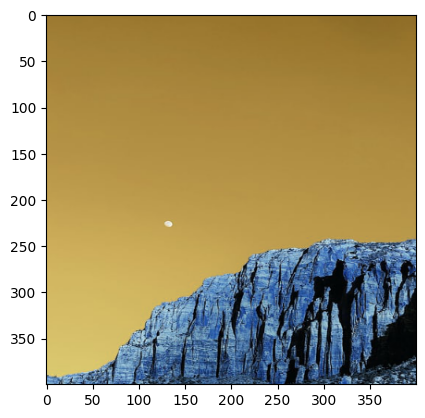

In [3]:
plt.imshow(image)

In [4]:
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Coordinates: ({}, {})".format(x, y))

cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)
cv2.imshow("Image", image)
cv2.waitKey(0)

Coordinates: (347, 266)
Coordinates: (350, 216)
Coordinates: (395, 245)
Coordinates: (2, 397)


-1

In [5]:
x1=395
y1=245
x2=2
y2=397
start_x = min(x1, x2)
start_y = min(y1, y2)
width = abs(x1 - x2)
height = abs(y1 - y2)

rect = (start_x, start_y, width, height)


In [6]:
mask = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (start_x, start_y, width, height)  # Region of interest coordinates
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 3.15928747e-01,  3.59429457e-01,  2.69671209e-01,
          3.40223865e-02,  2.09482011e-02,  1.59612695e+02,
          1.25147176e+02,  5.21113381e+01,  1.75150553e+02,
          1.40821640e+02,  6.55042967e+01,  1.91489196e+02,
          1.58763779e+02,  7.87137582e+01,  1.57974255e+02,
          1.48436043e+02,  1.09570190e+02,  3.42953345e+01,
          5.21285211e+01,  7.17187500e+01,  5.00384964e+01,
          4.85224625e+01,  4.28387441e+01,  4.85224625e+01,
          4.85679495e+01,  4.28473522e+01,  4.28387441e+01,
          4.28473522e+01,  3.83429227e+01,  2.20596518e+01,
          2.38789419e+01,  2.00912778e+01,  2.38789419e+01,
          2.59194229e+01,  2.16727131e+01,  2.00912778e+01,
          2.16727131e+01,  1.84016374e+01,  5.32547383

In [7]:
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]


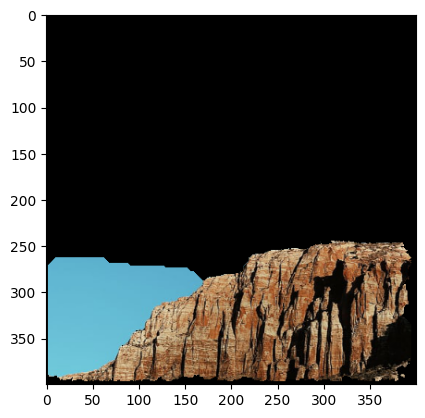

In [8]:
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()
